In [10]:
import json
import pandas
import os
from glob import glob
from tqdm.autonotebook import tqdm
import pandas as pd

In [8]:
jsons = glob("../gomez/seqfiles_linkbert_810_5/*/seq.json")

In [17]:
data = []
for json_file in tqdm(jsons, desc="Processing JSON files"):
    folder_name = os.path.basename(os.path.dirname(json_file))
    try:
        with open(json_file) as f:
            json_data = json.load(f)
            p_value = json_data["test results"]["p-value"]
            data.append({'name': folder_name, 'p_value': p_value})
    except json.JSONDecodeError:
        continue

df = pd.DataFrame(data)


In [24]:
df[df["p_value"] < 0.05].shape[0] /df[df["p_value"] > 0.05].shape[0]

0.20454545454545456

In [25]:
df.shape[0]

901

<Axes: >

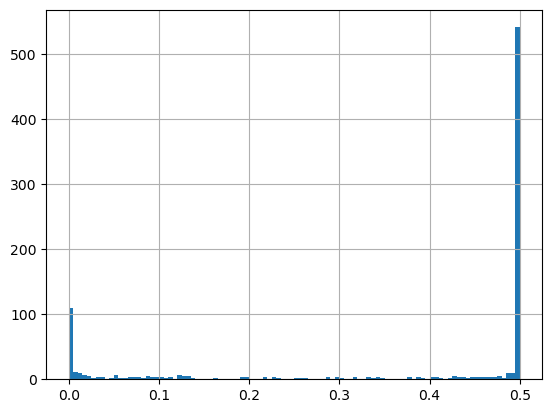

In [19]:
df.p_value.hist(bins=100)

""
